# Image Classification and Transfer Learning

This notebook is mostly a cut and paste of:

1. [Keras Image Classiciation Example](https://keras.io/examples/vision/image_classification_from_scratch/)
1. [Keras Transfer Learning Example](https://keras.io/examples/vision/keypoint_detection/)
1. [Keras Transfer Learning Documentation](https://keras.io/guides/transfer_learning/)

## Plan

The plan for today is to setup a image classification scenario where there are insufficient examples in the training set, necessitating the use of Transfer Learning.

## Image Classification Example

This section is basically a cut and paste of the [Keras Image Classiciation Example](https://keras.io/examples/vision/image_classification_from_scratch/), so I won't copy and paste the text also. We will follow the example from the Keras page.

Differences are:
* To "simulate" the cirmumstance of small training sample, we'll delete all but 100 images of each class.
* We will only train a few epochs to demonstrate it's not doing well.
* We use a slightly larger image size (for compatibility with more models for transfer learning).


In [ ]:
# install keras
# pixi add keras

▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                        

▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                        

▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                        

▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                        

▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                        

▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                        

▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                        

▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                        

▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [────────────────────]  0/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                        

▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
⠒ solving              [────────────────────]  0/1  default (linux-64)          
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
⠲ solving              [────────────────────]  0/1  default (linux-64)          
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
⠲ solving              [────────────────────]  0/1  default (linux-64)          
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
⠴ solving              [────────────────────]  0/1  default (linux-64)          
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                        

▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [━━━━━━━━━━━━━━━━━━━━]  1/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [━━━━━━━━━━━━━━━━━━━━]  1/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [━━━━━━━━━━━━━━━━━━━━]  1/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [━━━━━━━━━━━━━━━━━━━━]  1/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                        

▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [━━━━━━━━━━━━━━━━━━━━]  1/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [━━━━━━━━━━━━━━━━━━━━]  1/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [━━━━━━━━━━━━━━━━━━━━]  1/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                                                                             
▪ solving              [━━━━━━━━━━━━━━━━━━━━]  1/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    0/3                        

▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    1/3                                                                             
▪ solving              [━━━━━━━━━━━━━━━━━━━━]  1/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    1/3                                                                             
▪ solving              [━━━━━━━━━━━━━━━━━━━━]  1/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    1/3                                                                             
▪ solving              [━━━━━━━━━━━━━━━━━━━━]  1/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] ──────────────]    1/3                                                                             
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] 0m/1                              
▪ fetching repodata    [━━━━━━━━━━━━━━━━━━━━] 0m/1                              
▪ fetching 

In [1]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

2025-07-08 07:52:53.589053: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


We are downloading the data here. Note that it's commented out because we only need to do this once.

In [2]:
#!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0  21.9M      0  0:00:35  0:00:35 --:--:-- 25.9M


We also only need to unzip once.

In [2]:
#!unzip -q kagglecatsanddogs_5340.zip
#!ls

 CDLA-Permissive-2.0.pdf			     kagglecatsanddogs_5340.zip
'Image Classification and Transfer Learning.ipynb'  'readme[1].txt'
 PetImages


In [3]:
#!ls PetImages

Cat  Dog


And we only need to delete the extra images only once.

In [4]:
num_skipped = 0
for folder_name in ("Cat", "Dog"):
     max_images = 100
     folder_path = os.path.join("PetImages", folder_name)
     for image_i,fname in enumerate(os.listdir(folder_path)):
         fpath = os.path.join(folder_path, fname)
         try:
             fobj = open(fpath, "rb")
             is_jfif = b"JFIF" in fobj.peek(10)
         finally:
             fobj.close()

         if image_i > max_images or not is_jfif:
             num_skipped += 1
             # Delete corrupted image
             os.remove(fpath)

print(f"Deleted {num_skipped} images.")

Deleted 0 images.


Note the image size change:

In [5]:
#image_size = (180, 180)
image_size = (224, 224)

batch_size = 10

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 186 files belonging to 2 classes.
Using 149 files for training.
Using 37 files for validation.


2025-07-08 07:54:21.159193: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


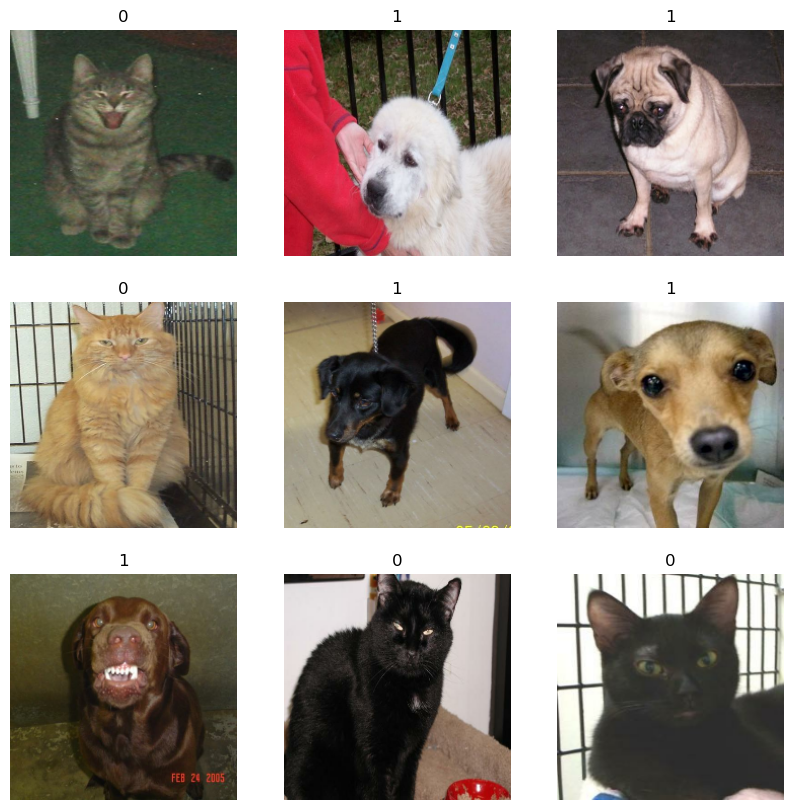

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [7]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

2025-07-08 07:54:27.463917: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


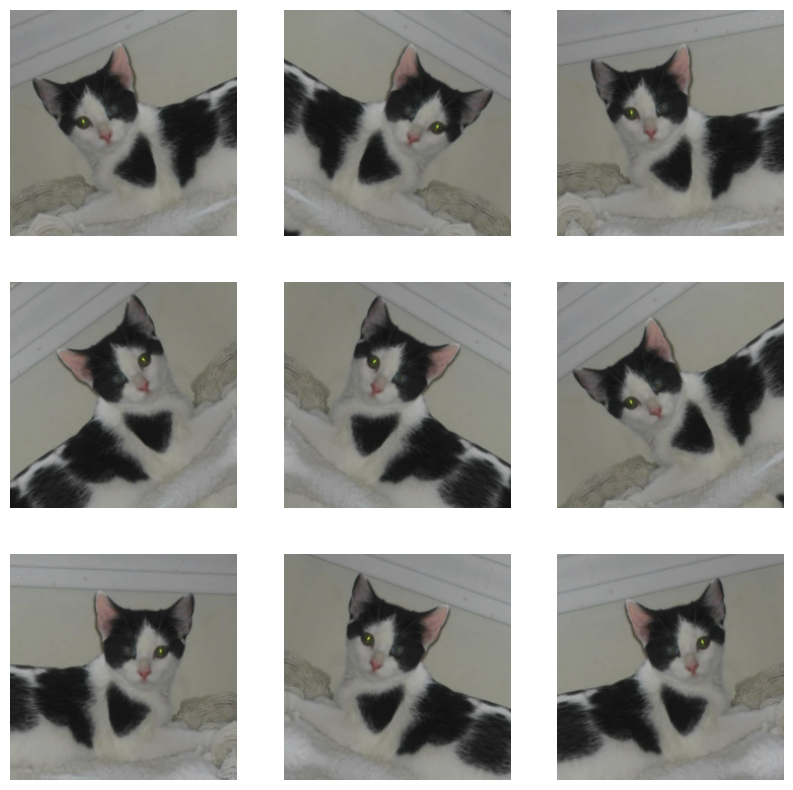

In [8]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [9]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

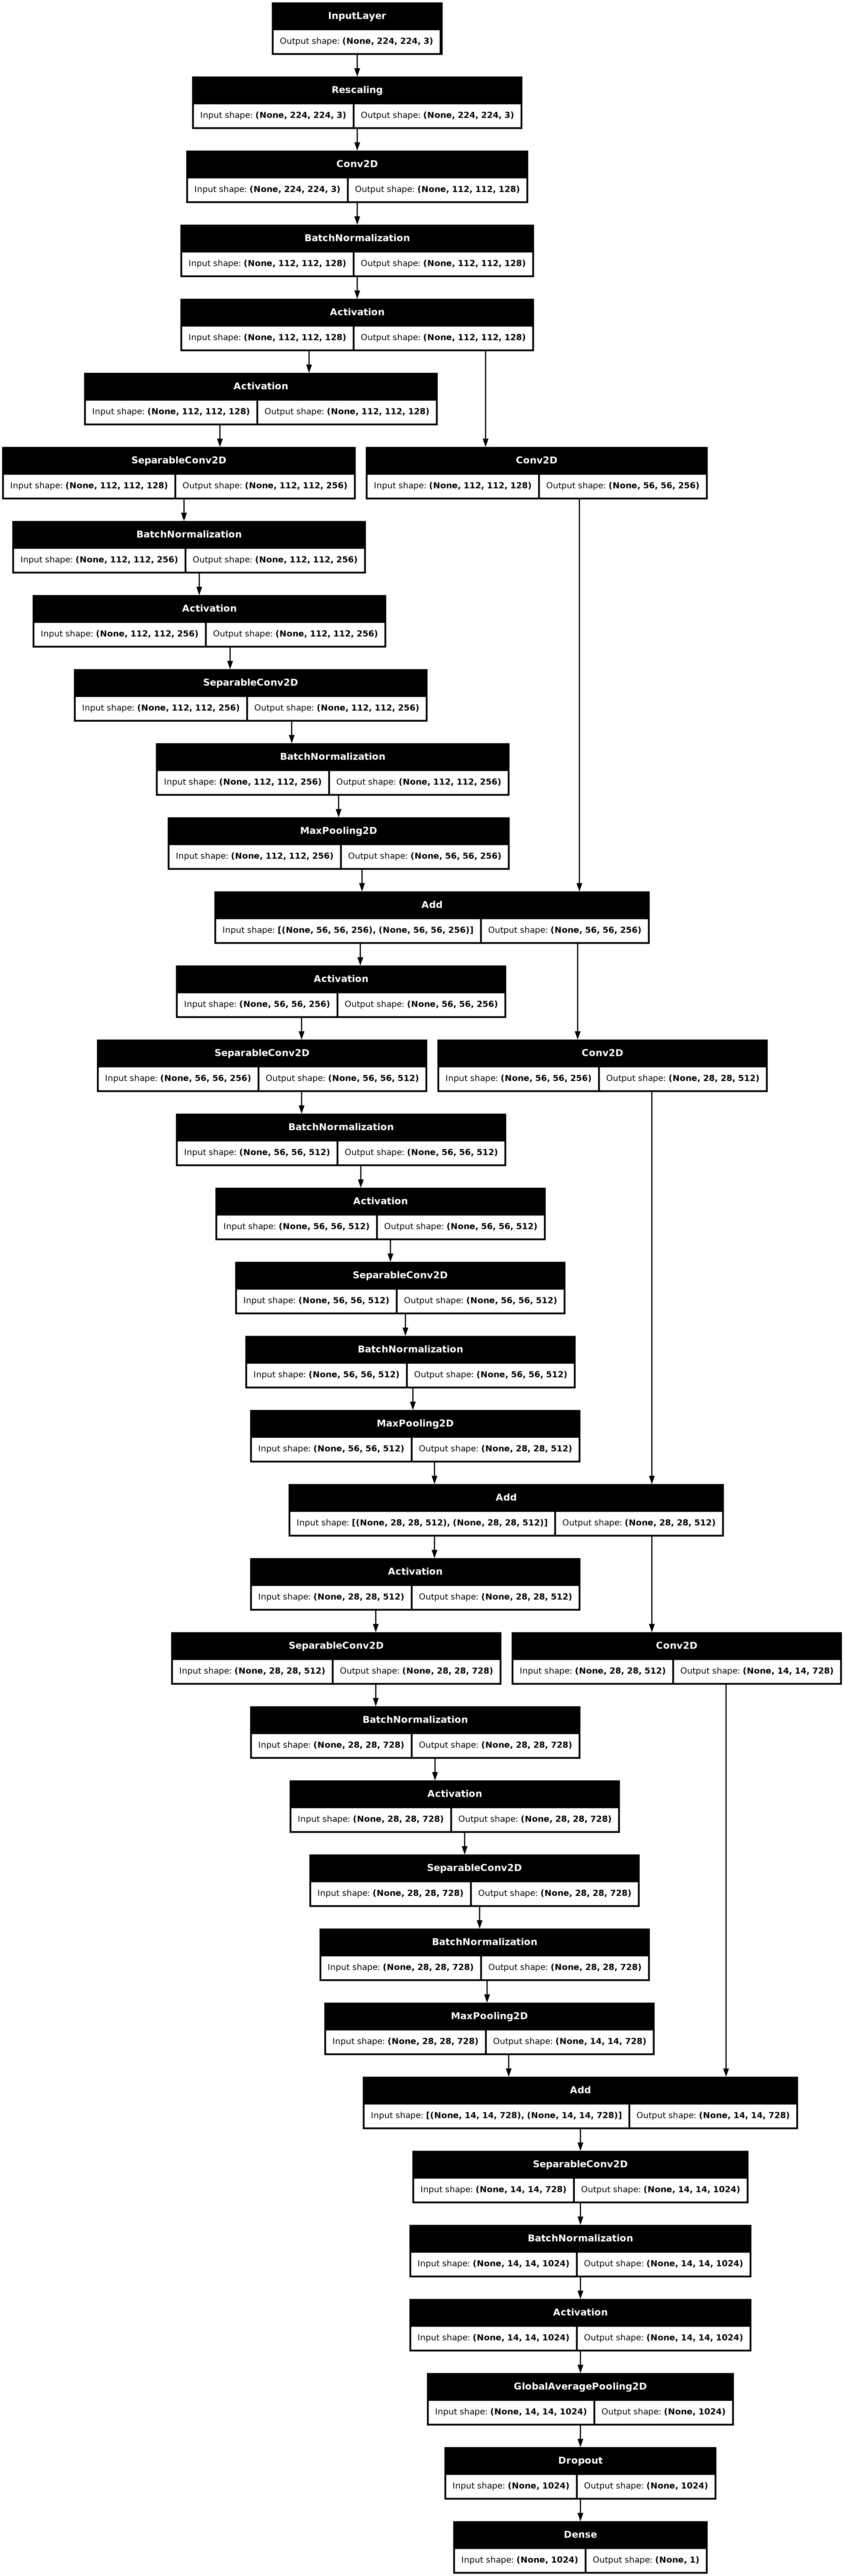

In [10]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        units = 1
    else:
        units = num_classes

    x = layers.Dropout(0.25)(x)
    # We specify activation=None so as to return logits
    outputs = layers.Dense(units, activation=None)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# pydot is needed to output model architecture
# !pixi add pydot

In [14]:
#from keras.optimizers import Adam
#from tensorflow.keras.optimizers import Adam
# Depending on your version of tf/keras optimizer may need changing
# here -> optimizer=keras.optimizers.legacy.Adam

epochs = 8

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy(name="acc")],
)

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - acc: 0.5400 - loss: 0.7548 - val_acc: 0.5135 - val_loss: 0.6930
Epoch 2/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - acc: 0.5439 - loss: 0.7005 - val_acc: 0.5135 - val_loss: 0.6928
Epoch 3/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - acc: 0.6153 - loss: 0.6104 - val_acc: 0.5135 - val_loss: 0.6933
Epoch 4/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - acc: 0.6996 - loss: 0.5635 - val_acc: 0.5135 - val_loss: 0.6942
Epoch 5/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - acc: 0.7981 - loss: 0.4661 - val_acc: 0.5135 - val_loss: 0.6960
Epoch 6/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - acc: 0.7410 - loss: 0.5064 - val_acc: 0.5135 - val_loss: 0.6990
Epoch 7/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - acc: 0.7478 - loss: 0.5477 - val_acc: 0.5135 - val_loss: 0.7033
Epoch 8/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 97s 7s/step - acc: 0.7168 - loss: 0.5381 - val_acc: 0.5135 - val_loss: 0.7084


#### As you can see, the model doesn't perform very well on this small dataset. It also takes a very long time to go through the data on this laptop without a GPU.

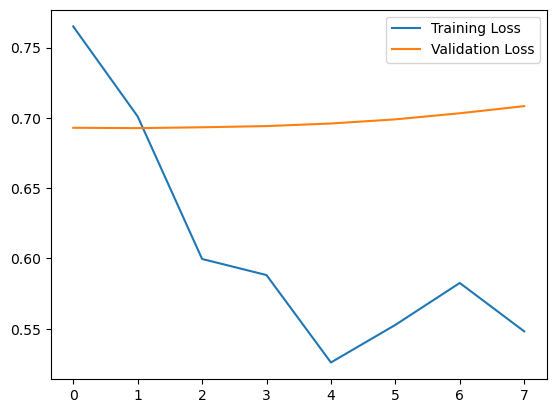

In [15]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

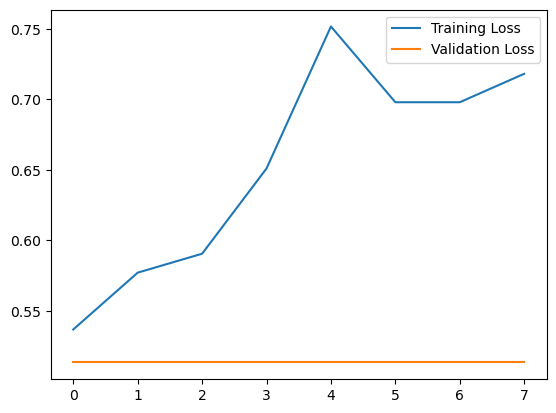

In [16]:
plt.plot(range(len(history.history["acc"])),history.history["acc"],label="Training Loss")
plt.plot(range(len(history.history["val_acc"])),history.history["val_acc"],label="Validation Loss")
plt.legend()

## Transfer Learning

Now we will follow [Keras Transfer Learning Example](https://keras.io/examples/vision/keypoint_detection/), which is setup for a different task (object detection).

Differences from that example:
* Using the same cat/dog dataset as before.
* Changing task from object detection to classification, using exactly the same final layers as the model above.
* Wrapping things in functions that mirror what we did above.

In [17]:
def make_transfer_model(input_shape, num_classes):
    # Load the pre-trained weights of MobileNetV2 and freeze the weights
    backbone = keras.applications.MobileNetV2(
        weights="imagenet",
        include_top=False,
        input_shape=input_shape,
    )
    backbone.trainable = False

    inputs = layers.Input(input_shape)
    x = keras.applications.mobilenet_v2.preprocess_input(inputs)
    x = backbone(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        units = 1
    else:
        units = num_classes

    x = layers.Dropout(0.25)(x)
    # We specify activation=None so as to return logits
    outputs = layers.Dense(units, activation=None)(x)

    return keras.Model(inputs, outputs, name="keypoint_detector")

In [18]:
model2 = make_transfer_model(input_shape=image_size + (3,), num_classes=2)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
epochs = 8

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model2.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy(name="acc")],
)

history = model2.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 357ms/step - acc: 0.6327 - loss: 0.7006 - val_acc: 0.5946 - val_loss: 0.5526
Epoch 2/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 258ms/step - acc: 0.6940 - loss: 0.4771 - val_acc: 0.6757 - val_loss: 0.4619
Epoch 3/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 251ms/step - acc: 0.7141 - loss: 0.4499 - val_acc: 0.7297 - val_loss: 0.3954
Epoch 4/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step - acc: 0.8508 - loss: 0.3285 - val_acc: 0.7297 - val_loss: 0.3571
Epoch 5/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 283ms/step - acc: 0.8328 - loss: 0.3074 - val_acc: 0.7568 - val_loss: 0.3066
Epoch 6/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step - acc: 0.8689 - loss: 0.2543 - val_acc: 0.8108 - val_loss: 0.2770
Epoch 7/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 285ms/step - acc: 0.9127 - loss: 0.2135 - val_acc: 0.8108 - val_loss: 0.2547
Epoch 8/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 292ms/step - acc: 0.8768 - loss: 0.2267 - val_acc: 0.8378 - val_loss: 0.2304


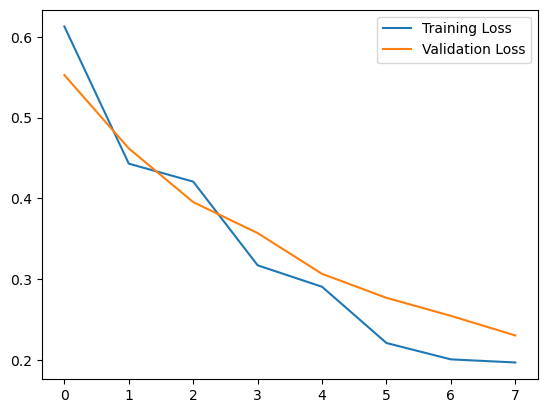

In [21]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

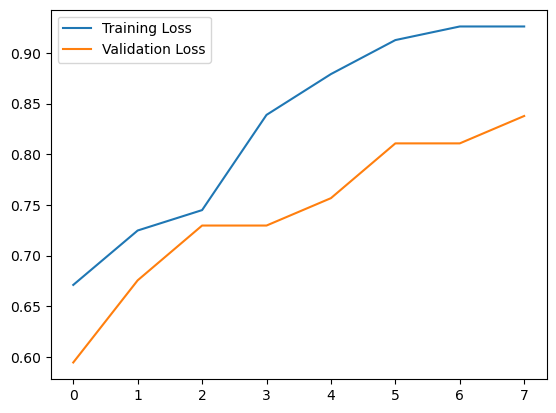

In [22]:
plt.plot(range(len(history.history["acc"])),history.history["acc"],label="Training Loss")
plt.plot(range(len(history.history["val_acc"])),history.history["val_acc"],label="Validation Loss")
plt.legend()

## Computer Vision Homework

* Select an image classification dataset of your choice. 
    * Images should be at least 100x100 size.
    * Image datasets are can be very large and we are going to only use a relatively subset.
        * Select Datasets that are either:
            * Reasonable size 
                * You can download in reasonable time 
                * Small enough to not take too much space on your computer
            * Allow you to download a subset.
    * Some example datasets:
        * [Big list from Kaggle](https://www.kaggle.com/datasets?search=image)
        * [Images of buildings, forest, glacier, mountain, sea, street](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)
        * [Indoor Scenes](https://www.kaggle.com/datasets/itsahmad/indoor-scenes-cvpr-2019/data)
        * [Concrete Cracks](https://data.mendeley.com/datasets/5y9wdsg2zt/2)
        * [Architectural Elements](https://old.datahub.io/dataset/architectural-heritage-elements-image-dataset)
        * [Fruits](https://www.kaggle.com/datasets/moltean/fruits)
        * [Scene Understanding](https://www.tensorflow.org/datasets/catalog/sun397)
        * [blood-cells](https://www.kaggle.com/datasets/paultimothymooney/blood-cells)
        * [Cellular Recursion](https://www.kaggle.com/datasets/xhlulu/recursion-cellular-image-classification-224-jpg)
* Create a new notebook for working out the data loader and augmentation (`DataLoader.ipynb`).
    * Follow the Keras examples and this notebook.
    * Setup the dataset for a demonstration of transfer learning
        * Perform any cleaning necessary, like throwing out bad images. 
            * This will be specific to your dataset. 
            * You may discover a problem later, come back and eliminate the bad images here.
        * Select at most 5 classes. Discard the rest of the data.
        * Create a smaller subset of less 100 images per class for training and testing.
        * Figure out how the labels are provided and create a data loader to load the data.
            * If the images are separated into subdirectories, the example above works.
            * If the image information is in a CSV file, easist path is to figure out the way to separate your classes into subdirectories and use the above example.
    * Visualize the images, making sure the data loader is working properly.
    * Create a module which holds the data loader and any other code you may need to reuse.
* Create a new notebook to train a baseline model (`TrainBaseModel.ipynb`)
    * Implement and train a transfer learning model, selecting a model from [Keras Built-in Vision Models](https://keras.io/api/applications/)
    * Make sure you look make the learning curves.
    * Save the model using `model.save()` (see [Keras Model Saving](https://keras.io/guides/serialization_and_saving/)
* Create a new notebook to see effect of data augmentation a baseline model (`TrainBaseModelAugmentation.ipynb`):
    * Add data augmentation.
        * Select at least 3 augmentations that make sense for your datasets (see [Keras Image Augmentation Layers](https://keras.io/api/layers/preprocessing_layers/image_augmentation/)).
        * Visualize the data augmentation to make sure it's working as expected.
    * Train the same model now with data augmentation.
    * Save the new model.   
    * Test if data augmentation is helping:
        * Create a new notebook (`CompareAugmentation.ipynb`)
        * Load the 2 models and compare the ROC curves with and without augmentation.
* Train the three different transfer learning models (`Train-XXXX.ipynb`):
    * Select 2 additional models from [Keras Built-in Vision Models](https://keras.io/api/applications/).
    * Create a new notebook for the each model.
        * Implement and train the model.
        * Make sure you look make the learning curves.
        * Save the model using `model.save` (see [Keras Model Saving](https://keras.io/guides/serialization_and_saving/)
    * Copy the notebook and try a different base model.
* Compare the three models:
    * Create a new notebook (`CompareModels.ipynb`)
    * Load the 3 models.
    * Make a plot comparing the 3 ROC curves of the 3 models on the validation dataset.
